### Importing necessary modules and dependency

In [122]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from IPython.display import clear_output
import time
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# import graphviz
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn import svm
from pandas.api.types import CategoricalDtype
%matplotlib inline

### Loading pre-processed database

In [123]:
data_path = os.path.join('data/GoldenData.csv')
final = pd.read_csv(data_path, delimiter = ',')

### Code for determining artist rank

In [124]:
total_songs = (len(final['URL'].unique()))
total_artists = len(final['Artist'].unique())
print(total_songs,total_artists)
dic ={}
for artist in final['Artist'].unique():
    dic[artist] = (len(final.loc[final['Artist'] == artist]['URL'].unique()))


artistVsProbs= {}
for k,v in dic.items():
    artistVsProbs[k] = (v)/(total_songs)
 
# For Debugging
#for k,v in artistVsProbs.items():
#    print(k,v)
#s = 0
#for k,v in artistVsProbs.items():
#    s+=v
#print(s)

1544 452


### Artist vs song frequency

In [125]:
dic = final['Artist'].value_counts()
print(len(final['Artist'].unique()))
artistVsSongFreq= {}
cnt =0
i=1
for k,v in dic.items() :
    if v < 1:
        artistVsSongFreq[k] = 0
    else:
        artistVsSongFreq[k] = i
        i+=1

#print(artistVsSongFreq)
#j = 0
#for k,v in artistVsSongFreq.items():
#    artistVsSongFreq[k] = int(bin(v)[2:])
print(artistVsSongFreq)

452
{'Ed Sheeran': 1, 'Drake': 2, 'The Chainsmokers': 3, 'Kendrick Lamar': 4, 'Post Malone': 5, 'The Weeknd': 6, 'Migos': 7, 'Calvin Harris': 8, 'J Balvin': 9, 'Shawn Mendes': 10, 'Bruno Mars': 11, 'Martin Garrix': 12, 'XXXTENTACION': 13, 'Imagine Dragons': 14, 'Major Lazer': 15, 'Justin Bieber': 16, 'Clean Bandit': 17, 'Charlie Puth': 18, 'Ozuna': 19, 'Future': 20, 'ZAYN': 21, 'Twenty One Pilots': 22, 'Luis Fonsi': 23, 'Kygo': 24, 'Lil Uzi Vert': 25, 'Jonas Blue': 26, 'CNCO': 27, 'Eminem': 28, 'Maroon 5': 29, 'Travis Scott': 30, 'Ariana Grande': 31, 'Shakira': 32, 'Alan Walker': 33, 'Khalid': 34, 'Camila Cabello': 35, 'Big Sean': 36, '21 Savage': 37, 'DJ Khaled': 38, 'Hailee Steinfeld': 39, 'Piso 21': 40, 'Rae Sremmurd': 41, 'Sam Smith': 42, 'DJ Snake': 43, 'Nicky Jam': 44, 'Wisin': 45, 'Kodak Black': 46, 'Jason Derulo': 47, 'Sebastian Yatra': 48, 'James Arthur': 49, 'Katy Perry': 50, 'Maluma': 51, 'Taylor Swift': 52, 'Daddy Yankee': 53, 'Niall Horan': 54, 'Zedd': 55, 'Sia': 56, 'Ales

### Mapping utilities for column data

In [126]:
def artistFreq(artist):
#     print(dic[artist])
    return artistVsSongFreq[artist]

def artistProb(artist):
#     print(dic[artist])
    return artistVsProbs[artist]

def manageday(val):
    if(val>365):
        return val-365
    else:
        return val

def decToBin(x):
    return int(bin(x)[2:])
def normalize(x):
    return ((x-mn)/(mx-mn))

final['Artist_Rank']= final['Artist'].map(artistProb)
final['Artist_Rank_Freq']= final['Artist'].map(artistFreq)

In [127]:
df = final.copy()
df['Day']=df['Day'].map(manageday)

mn = df['Position'].min()
mx = df['Position'].max()
df['norm_pos'] = df['Position'].map(normalize)

mn = df['Tempo'].min()
mx = df['Tempo'].max()
df['Tempo'] = df['Tempo'].map(normalize)

mn = df['Artist_Rank'].min()
mx = df['Artist_Rank'].max()
print(mn,mx)
df['norm_artist_rank'] = df['Artist_Rank'].map(normalize)

mn = df['Streams'].min()
mx = df['Streams'].max()
print(mn,mx)
df['norm_streams'] = df['Streams'].map(normalize)

mn = df['Day'].min()
mx = df['Day'].max()
print(mn,mx)
#df['norm_day'] = df['Day'].map(decToBin)
df['Norm_Day'] = df['Day'].map(normalize)
df['Norm_Day']

0.0006476683937823834 0.022020725388601035
1001 2001683
1 365


0        0.000000
1        0.002747
2        0.005495
3        0.008242
4        0.010989
           ...   
73100    0.013736
73101    0.010989
73102    0.013736
73103    0.013736
73104    0.013736
Name: Norm_Day, Length: 73105, dtype: float64

### Mapping routine for creating creating label classes

In [129]:
def classify(val):
    if (val <= 40):
        return 1
    elif (val >40 and val<=80):
        return 2
    elif (val >80 and val<=120):
        return 3
    else :
        return 4

In [130]:
df['Class']=df['Median_Position'].map(classify)
print(df.shape)
print(df.head(5))
df = df.drop(['Artist','Track Name','Region','Loudness','Date','Rank','Position','Streams'], axis = 1)
df.head(5)
df = shuffle(df)
df.head(10)

(73105, 28)
   Unnamed: 0                                                URL  \
0           0  https://open.spotify.com/track/5aAx2yezTd8zXrk...   
1           1  https://open.spotify.com/track/5aAx2yezTd8zXrk...   
2           2  https://open.spotify.com/track/5aAx2yezTd8zXrk...   
3           3  https://open.spotify.com/track/5aAx2yezTd8zXrk...   
4           4  https://open.spotify.com/track/5aAx2yezTd8zXrk...   

   Per_Day_Streams  Rank  Day  Position Track Name      Artist  Streams  \
0          6266206     1    1        19    Starboy  The Weeknd     7006   
1          6679476     1    2        15    Starboy  The Weeknd     7330   
2          7119578     1    3        11    Starboy  The Weeknd     8676   
3          7231624     1    4        11    Starboy  The Weeknd     8903   
4          7151349     1    5        12    Starboy  The Weeknd     8305   

         Date  ... Instrumentalness  Liveness  Valence     Tempo  \
0  01-01-2017  ...         0.000003     0.134    0.535  0.87

,Unnamed: 0,URL,Per_Day_Streams,Day,Median_Position,Artist_Rank,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Artist_Rank_Freq,norm_pos,norm_artist_rank,norm_streams,Norm_Day,Class
12230,12230,https://open.spotify.com/track/1a5Yu5L18qNxVhX...,1322411,132,110.0,0.001295,0.788,0.430,0.0419,0.5370,0.002610,0.0936,0.461,0.472223,106,0.457286,0.030303,0.000969,0.359890,3
35409,35409,https://open.spotify.com/track/6VHdcVbiKLYYOcM...,844134,144,46.0,0.000648,0.724,0.840,0.0392,0.0530,0.000000,0.7270,0.835,0.284119,182,0.155779,0.000000,0.002782,0.392857,2
23696,23696,https://open.spotify.com/track/2LBqCSwhJGcFQeT...,701438,3,105.0,0.009067,0.586,0.525,0.0615,0.1110,0.000000,0.1340,0.508,0.545197,6,0.396985,0.393939,0.121269,0.005495,3
69953,69953,https://open.spotify.com/track/3hBBKuWJfxlIlnd...,5079645,345,27.0,0.010363,0.795,0.615,0.0671,0.0786,0.000003,0.0855,0.393,0.397028,29,0.246231,0.454545,0.002581,0.945055,1
25858,25858,https://open.spotify.com/track/43jBqV3j3Xi1g6w...,2796124,42,40.5,0.001295,0.781,0.570,0.1880,0.2730,0.000000,0.1960,0.858,0.378522,177,0.246231,0.030303,0.024575,0.112637,2
29332,29332,https://open.spotify.com/track/5tFep7dXGd7vEJ6...,859791,24,78.0,0.004534,0.850,0.405,0.2250,0.1190,0.000118,0.0707,0.344,0.585012,98,0.211055,0.181818,0.185106,0.063187,2
31115,31115,https://open.spotify.com/track/152lZdxL1OR0ZMW...,2069316,79,95.5,0.001295,0.736,0.449,0.4250,0.3300,0.000162,0.0898,0.326,0.209570,34,0.266332,0.030303,0.000078,0.214286,3
55107,55107,https://open.spotify.com/track/3A7qX2QjDlPnazU...,817229,335,159.0,0.003238,0.548,0.650,0.0591,0.2190,0.000000,0.2250,0.557,0.616133,82,0.949749,0.121212,0.007156,0.917582,4
39832,39832,https://open.spotify.com/track/1x5sYLZiu9r5E43...,1136867,320,85.0,0.001943,0.707,0.629,0.0563,0.2590,0.000016,0.1380,0.457,0.477662,17,0.879397,0.060606,0.002710,0.876374,3
52491,52491,https://open.spotify.com/track/4B2OmQGLBVB51aY...,1079068,146,82.0,0.008420,0.918,0.445,0.1660,0.0144,0.000002,0.1230,0.292,0.509642,250,0.291457,0.363636,0.219439,0.398352,3


### Creating feature dataset(x) and classs label(y)

In [131]:
y = df['Class']
x = df.drop(['Unnamed: 0', 'Artist_Rank_Freq', 'Day', 'Class','Median_Position','URL','Per_Day_Streams','norm_pos','norm_artist_rank','norm_streams'],axis = 1)
x.head()

,Artist_Rank,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Norm_Day
12230,0.001295,0.788,0.430,0.0419,0.5370,0.002610,0.0936,0.461,0.472223,0.359890
35409,0.000648,0.724,0.840,0.0392,0.0530,0.000000,0.7270,0.835,0.284119,0.392857
23696,0.009067,0.586,0.525,0.0615,0.1110,0.000000,0.1340,0.508,0.545197,0.005495
69953,0.010363,0.795,0.615,0.0671,0.0786,0.000003,0.0855,0.393,0.397028,0.945055
25858,0.001295,0.781,0.570,0.1880,0.2730,0.000000,0.1960,0.858,0.378522,0.112637


### PCA for projecting 11 Dimensional data to 3 Dimension for visualisation

[1, 2, 3, 4]


C:\Users\Sparsh Rawal\.conda\envs\mlp\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


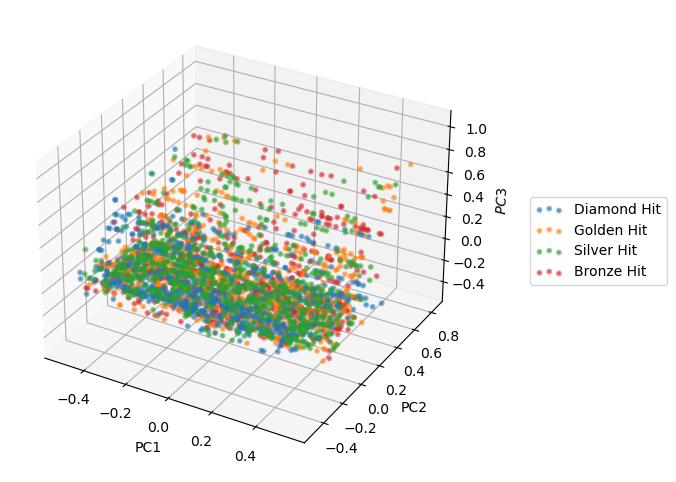

In [132]:
from sklearn import decomposition
from mpl_toolkits import mplot3d

pca = PCA(n_components=3)
X_3d = pca.fit_transform(x[0:3000])
p = y[0:3000]

class_labels = [1,2,3,4]
sub_labels = class_labels
print(sub_labels)
class_categories = ['Diamond Hit', 'Golden Hit', 'Silver Hit', 'Bronze Hit']
sub_cats = [class_categories[label-1] for label in sub_labels]
sub_cats

# --- Basic Plot --- #
tmpf =plt.figure(figsize=(6,6))
ax = plt.axes(projection ="3d")
for label, cat in zip(sub_labels, sub_cats):
    #plt.scatter(X_2d[y == label, 0], X_2d[y == label, 1], alpha=.5, lw=2, label=cat)
    #plt.scatter(X_2d[p == label, 0], X_2d[p == label, 1], alpha=.5, lw=2, label=cat)
    ax.scatter3D(X_3d[p == label, 0], X_3d[p == label, 1], X_3d[p == label, 2], alpha=.5, lw=2, label=cat,marker='.')
    #plt.axis('equal')
    
#ax.set_zlabel('$PC3$', fontsize=30, rotation = 0)
ax.set_zlabel('$PC3$')
ax.legend(loc='center left', scatterpoints=3, bbox_to_anchor=[1.11, 0.5])
#ax.set_title('Labelled data in PCA space')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#plt.zlabel('PC3')
top_plot = plt.gca()
tmpf.show()
tmpf.savefig('PCA.pdf',bbox_inches='tight')

#print(p.value_counts())
#pca.explained_variance_ratio_

### Method for plotting confusion matrix

In [133]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix',savename=''):
    """Plots a confusion matrix."""
    fig = plt.figure(figsize=(6,4))
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(savename,bbox_inches='tight')
    plt.show()
    

### Creating LogisticRegression Instance
### Paramters multi_class='multinomial', max_iter = 1000
### Train/Test set split = 80/20

Train Score : 37.11442445797141 %
Test Score : 36.80322823336297 %


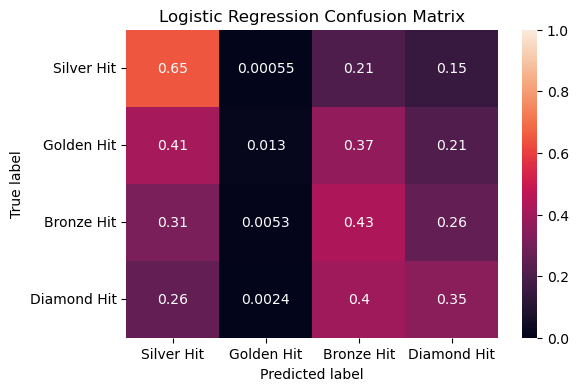

              precision    recall  f1-score   support

           1       0.40      0.65      0.50      3661
           2       0.58      0.01      0.03      3331
           3       0.33      0.43      0.37      3951
           4       0.36      0.35      0.35      3678

    accuracy                           0.37     14621
   macro avg       0.42      0.36      0.31     14621
weighted avg       0.41      0.37      0.32     14621

Cohen's Kappa score:  0.14886564099855382


In [134]:
x_train , x_test,y_train ,y_test = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)
logistic = LogisticRegression(random_state=100,multi_class='multinomial',max_iter=1000)
logistic.fit(X=x_train,y=y_train)
print("Train Score :",logistic.score(X=x_train, y=y_train)*100,"%")
print("Test Score :",logistic.score(X=x_test, y=y_test)*100,"%")

## Confusion matrix for Logistic Regression

pred_y = np.array(logistic.predict(x_test))
true_y = y_test.copy(deep=True)
cm = confusion_matrix(true_y, pred_y, normalize='true')
plot_confusion_matrix(cm, classes={'Diamond Hit', 'Golden Hit', 'Bronze Hit', 'Silver Hit'},title='Logistic Regression Confusion Matrix',savename = "LogisticRegressionConfusionMatrix.pdf")

### Evaluating LogisticRegression model
from sklearn.metrics import classification_report
print(classification_report(y_true=true_y, y_pred=pred_y, labels=[1,2,3,4]))
print ("Cohen's Kappa score: " , cohen_kappa_score(true_y, pred_y))

### Bar-graph highlighting difference between true and predicted values

[3661 3331 3951 3678]
[5915   76 5119 3511]
[3661 3331 3951 3678]
[5915   76 5119 3511]


<BarContainer object of 4 artists>

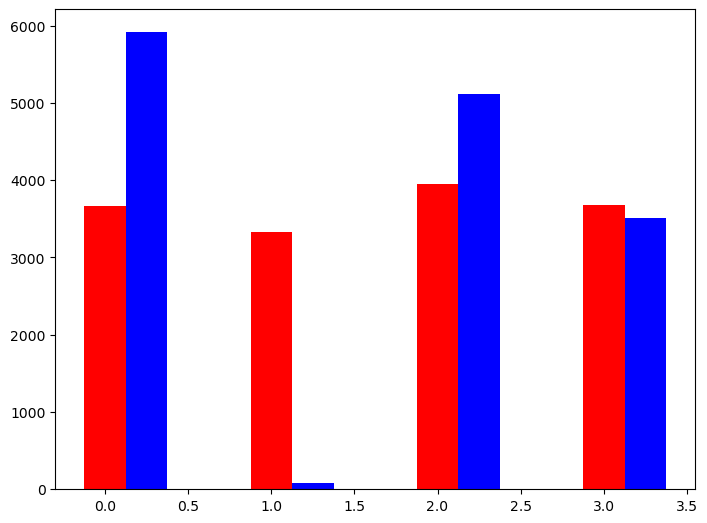

In [135]:
## Do we need to show this graph.
unique, counts1 = np.unique(pred_y, return_counts=True)
unique, counts = np.unique(true_y, return_counts=True)
print(counts)
print(counts1)
diff = len(counts) - len(counts1)
if diff > 0:
    i = 0
    while i < diff:
        counts1 = np.insert(counts1,3,0)
        i += 1

print(counts)
print(counts1)

data = [counts,counts1]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)


### Hyper-paramenter tuning for Decision Tree
### Train/Validation/Test data split = 80/10/10
### Plotting cross-entropy loss for training and validation data set

Max depth values :  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
 Train log-loss :  [1.181014890523542, 1.1177772521611207, 1.0396922926284067, 0.9424926486698537, 0.8469650317658309, 0.7432117617044134, 0.6445263249693651, 0.553520212803485, 0.4618090711115109, 0.3746270113736273, 0.3077460583537526, 0.24628677373609575, 0.19218909921944088, 0.14552805272951094, 0.10385507944177966, 0.07190004251048751, 0.051135013601684806, 0.034839709750139954, 0.023064062991721698, 0.015257503917942368, 0.010012093867587344]
 Validation log-loss :  [1.1726558413247343, 1.1214302962061966, 1.0741513892790295, 1.0172314432906966, 1.0054577310796105, 0.9927671221602404, 1.1044431870729197, 1.2768894856577386, 1.3942190980491933, 1.6174821005646132, 1.9642133512215811, 2.2509916052043883, 2.546072123371629, 2.7946723813916665, 3.0855557880925293, 3.2616867174126636, 3.5486393019585685, 3.8147096454618796, 3.9569183263791765, 4.094929460779785, 4.169418712890127]
 Vali

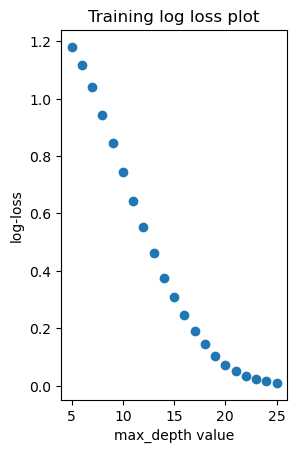

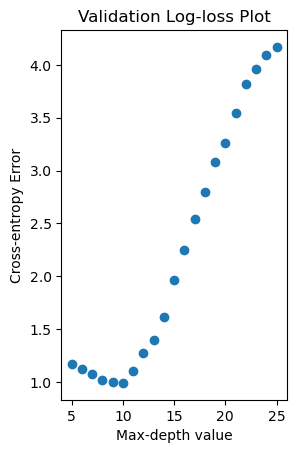

In [136]:
x_train , x_test, y_train ,y_test = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test,train_size=0.5, test_size=0.5, random_state=100)

depths = []
y_hat_train = []
y_hat_valid = []
train_accuracy = []
valid_accuracy = []
max_depth_list = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
for d in max_depth_list:
    #print("Running evaluation for max_depth : ", d)
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=d, random_state=100)
    dt.fit(x_train, y_train)
    depths.append(d)
    y_hat_train.append(log_loss(y_train,dt.predict_proba(x_train)))
    y_hat_valid.append(log_loss(y_valid,dt.predict_proba(x_valid)))
    train_accuracy.append(dt.score(x_train,y_train))
    valid_accuracy.append(dt.score(x_valid,y_valid))
    
print("Max depth values : ", max_depth_list)
print(" Train log-loss : ", y_hat_train)
print(" Validation log-loss : ", y_hat_valid)
print(" Validation accuracy: ", valid_accuracy)
print("Difference Train Vs Validation log-loss:", np.abs(np.array(y_hat_train) - np.array(y_hat_valid)))

plt.subplot(1,2,1)
plt.scatter(depths, y_hat_train)
plt.title('Training log loss plot')
plt.xlabel('max_depth value')
plt.ylabel('log-loss')
plt.savefig("DecisionTreeClassifier_TrainingLossPlot.pdf",bbox_inches='tight')
plt.show()


plt.subplot(1,2,1)
plt.scatter(depths, y_hat_valid)
plt.title('Validation Log-loss Plot')
plt.xlabel('Max-depth value')
plt.ylabel('Cross-entropy Error')
plt.savefig("DecisionTreeClassifier_ValidationLossPlot.pdf",bbox_inches='tight')
plt.show()


### DecisionTree classfier result on test data

In [137]:
x_train , x_test, y_train ,y_test = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test,train_size=0.5, test_size=0.5, random_state=100)
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=9, random_state=100)
dt.fit(x_train, y_train)
true_y = y_test.copy(deep=True)
pred_y = dt.predict(x_test)
print("Test Score :",dt.score(X=x_test, y=y_test)*100,"%")

## Feature Importance
i = 0
feature_list = dt.feature_names_in_
while i < len(feature_list):
    print(feature_list[i]," : ", dt.feature_importances_[i])
    i += 1

Test Score : 58.30939679934346 %
Artist_Rank  :  0.055633705677101415
Danceability  :  0.07844832312743728
Energy  :  0.07616339633507896
Speechiness  :  0.0735442208815757
Acousticness  :  0.08526278440330924
Instrumentalness  :  0.02494795460727191
Liveness  :  0.061157899088748614
Valence  :  0.1584906236819571
Tempo  :  0.17196448649777535
Norm_Day  :  0.21438660569974433


### Decision Tree confusion matrix, classification report

              precision    recall  f1-score   support

           1       0.62      0.81      0.70      1781
           2       0.59      0.38      0.46      1702
           3       0.49      0.63      0.55      1994
           4       0.69      0.50      0.58      1834

    accuracy                           0.58      7311
   macro avg       0.60      0.58      0.57      7311
weighted avg       0.59      0.58      0.57      7311

Cohen's Kappa score:  0.4415876743136542


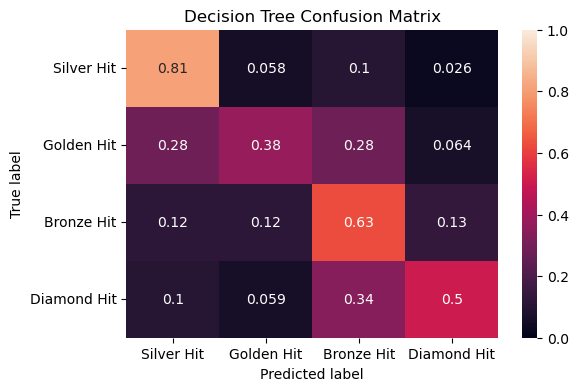

In [138]:
from sklearn.metrics import classification_report, cohen_kappa_score
print(classification_report(y_true=true_y, y_pred=pred_y, labels=[1,2,3,4]))
print("Cohen's Kappa score: " ,cohen_kappa_score(true_y, pred_y))
cm = confusion_matrix(true_y, pred_y, normalize='true')
plot_confusion_matrix(cm, classes={'Diamond Hit', 'Golden Hit', 'Bronze Hit', 'Silver Hit'}, title='Decision Tree Confusion Matrix',savename = "DecisionTreeConfusionMatrix.pdf")



### Hyper-paramenter tuning for Random Forest Classifier
### Train/Validation/Test data split = 80/10/10
### Plotting cross-entropy loss for training and validation data set

Max depth values :  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
 Train log-loss :  [1.1766547540152288, 1.117038312505048, 1.0414468642910373, 0.9645707618090673, 0.869275698358514, 0.7650373879240149, 0.6738000181067606, 0.5827698565795084, 0.48849205025694864, 0.4068288199437261, 0.33299084506814364, 0.2656723351349117, 0.22208584006530485, 0.18190402858256569, 0.145959165319911, 0.12088637440931331, 0.10265339555790161, 0.0869265591489835, 0.07892238185372928, 0.0702307728355095, 0.06746712398400627]
 Validation log-loss :  [1.1731303321280653, 1.1153608084497926, 1.0435818662360101, 0.96974318489967, 0.8817287310335225, 0.7850327800452356, 0.7034922063848074, 0.6273327759364706, 0.5482490211693481, 0.4920239156983403, 0.4296048561542761, 0.3828628643314369, 0.36225774636893804, 0.3579933384663416, 0.336937778589412, 0.3712436905736499, 0.411757394619192, 0.42653072667915176, 0.4816107910443643, 0.5353298501712593, 0.575931053340936]
 Validation a

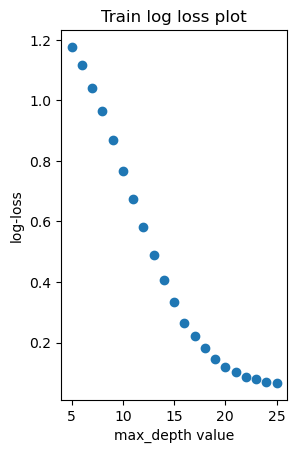

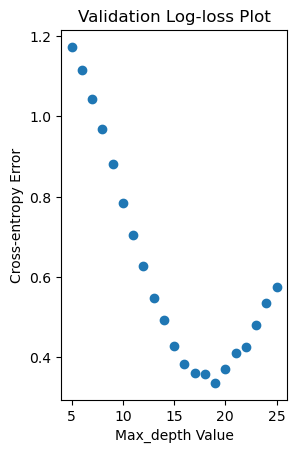

In [139]:
x_train , x_test, y_train ,y_test = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test,train_size=0.5, test_size=0.5, random_state=100)

## For hyperparameter tuning, we will modify the max_depth parameter.
depths = []
y_hat_train = []
y_hat_valid = []
train_accuracy = []
valid_accuracy = []
max_depth_list = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
for d in max_depth_list:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = d, criterion='entropy', random_state=100)
    rf_clf.fit(x_train, y_train)
    depths.append(d)
    y_hat_train.append(log_loss(y_train,rf_clf.predict_proba(x_train)))
    y_hat_valid.append(log_loss(y_valid,rf_clf.predict_proba(x_valid)))
    train_accuracy.append(rf_clf.score(x_train,y_train))
    valid_accuracy.append(rf_clf.score(x_valid,y_valid))

print("Max depth values : ", max_depth_list)
print(" Train log-loss : ", y_hat_train)
print(" Validation log-loss : ", y_hat_valid)
print(" Validation accuracy: ", valid_accuracy)
print("Difference Train Vs Validation log-loss:", np.abs(np.array(y_hat_train) - np.array(y_hat_valid)))


#plt.figure(figsize=(5, 5))
plt.subplot(1,2,1)
plt.scatter(depths, y_hat_train)
plt.title('Train log loss plot')
plt.xlabel('max_depth value')
plt.ylabel('log-loss')
plt.savefig("RandomForestClassifier_TrainingLossPlot.pdf",bbox_inches='tight')
plt.show()


#plt.figure(figsize=(5, 5))
plt.subplot(1,2,1)
plt.scatter(depths, y_hat_valid)
plt.title('Validation Log-loss Plot')
plt.xlabel('Max_depth Value')
plt.ylabel('Cross-entropy Error')
plt.savefig("RandomForestClassifier_ValidationLossPlot.pdf",bbox_inches='tight')
plt.show()


### RandomForest classfier result on test data

Test Score : 88.22322527697989 %
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1781
           2       0.87      0.87      0.87      1702
           3       0.83      0.82      0.83      1994
           4       0.88      0.89      0.88      1834

    accuracy                           0.88      7311
   macro avg       0.88      0.88      0.88      7311
weighted avg       0.88      0.88      0.88      7311

Cohen's Kappa score:  0.8427974736497629


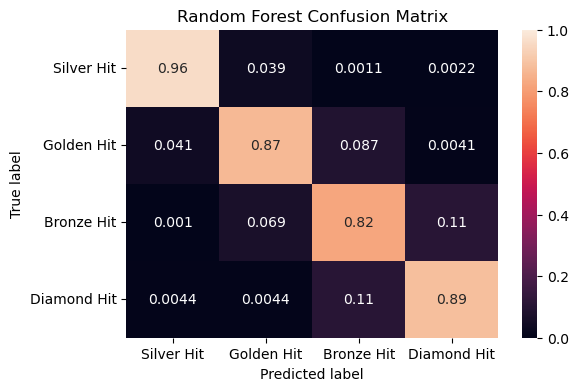

In [140]:
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 18, criterion='entropy')
rf_clf.fit(x_train, y_train)
print("Test Score :",rf_clf.score(X=x_test, y=y_test)*100,"%")
pred_y = np.array(rf_clf.predict(x_test))
true_y = y_test.copy(deep=True)

print(classification_report(y_true=true_y, y_pred=pred_y, labels=[1,2,3,4]))
print("Cohen's Kappa score: " ,cohen_kappa_score(true_y, pred_y))
cm = confusion_matrix(true_y, pred_y, normalize='true')
plot_confusion_matrix(cm, classes={'Diamond Hit', 'Golden Hit', 'Bronze Hit', 'Silver Hit'}, title='Random Forest Confusion Matrix',savename = "RandomForestConfusionMatrix.pdf")



### Plotting feature vs impact/importance value for Random Forest

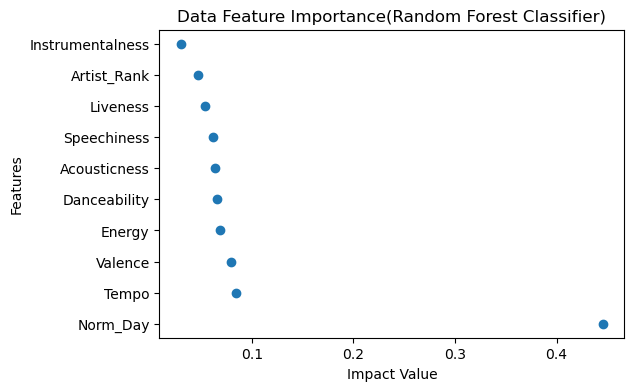

In [141]:
i = 0
feature_list = rf_clf.feature_names_in_
feature_impact = {}
while i < len(feature_list):
    feature_impact[feature_list[i]] = rf_clf.feature_importances_[i]
    i += 1

feature_impact = dict(sorted(feature_impact.items(), key=lambda item: item[1], reverse=True))
y_series = feature_impact.keys()
x_series = feature_impact.values()
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.scatter(x_series, y_series)
ax.set_xlabel('Impact Value')
ax.set_ylabel('Features')
ax.set_title('Data Feature Importance(Random Forest Classifier)')
#ax.tight_layout()
fig.savefig('FeatureImportance.pdf',bbox_inches='tight')

## Multi-class case preparing data for ROC and Precision Recall curve

In [142]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

y_vals = y
y_vals = y_vals.astype(np.uint8)
n_classes = len(set(y_vals))
Y = label_binarize(y_vals, classes=[1,2,3,4])

X_train, X_test, y_train, y_test = train_test_split(x, Y, random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=18, random_state=100))
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

(54828, 10)
(18277, 10)
(54828, 4)
(18277, 4)


### Precision Vs Recall curve for Random Forest Classifier

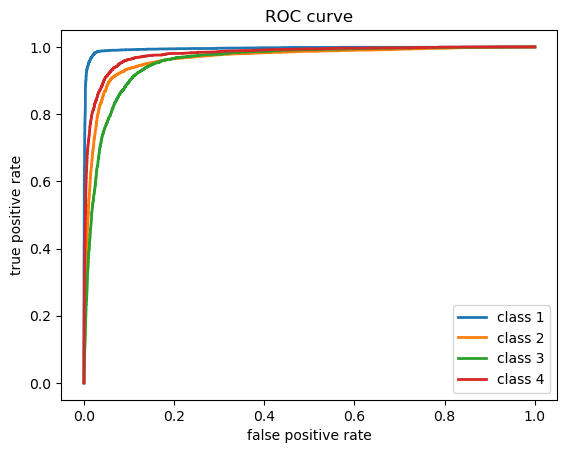

In [143]:
fpr = dict()
tpr = dict()
i = 1
while i <= n_classes:
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i-1], y_score[:, i-1])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))
    i += 1

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

### ROC curve

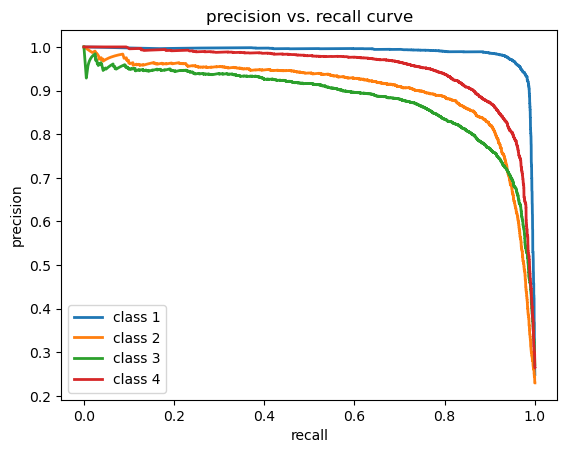

In [144]:
# precision recall curve
precision = dict()
recall = dict()
#for i in range(n_classes):
i = 1
while i<= n_classes:
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i-1],
                                                        y_score[:, i-1])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    i += 1
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()